In [6]:
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

shell_call("sudo apt install libgsl-dev")

Warning message in system(command, intern = TRUE, ...):
“running command 'sudo apt install libgsl-dev' had status 1”


In [7]:
install.packages("copula")

also installing the dependency ‘gsl’


Warning message in install.packages("copula"):
“installation of package ‘copula’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
library(copula)

In [9]:
data <- readRDS('var_2.rds')
names(data)

[1] "predictor"                 "predictor_DistrType"      
[3] "predictor_DistrParameters" "output"                   
[5] "output_DistrType"          "output_DistrParameters"

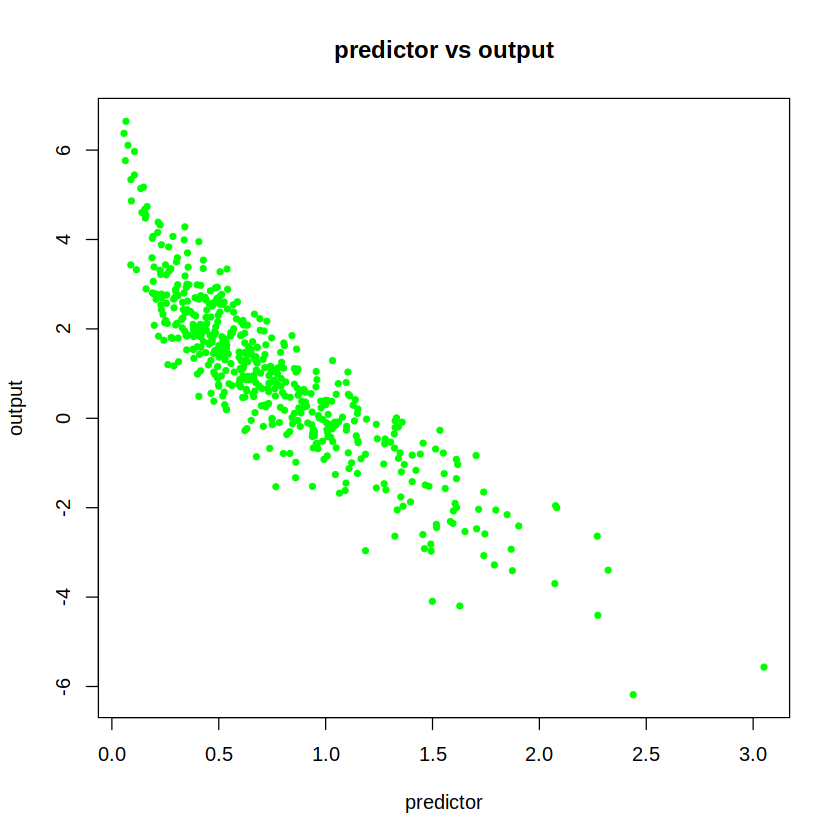

In [10]:
plot(data$predictor,data$output,main = 'predictor vs output', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')

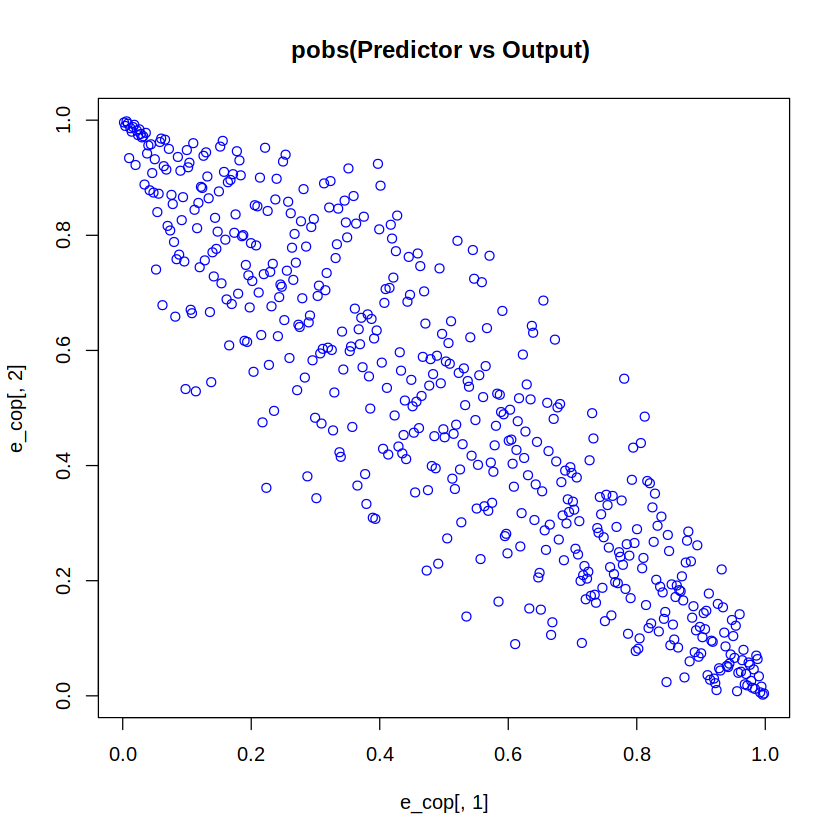

In [11]:
pred_out <- cbind(data$predictor,data$output)
e_cop <-pobs(pred_out)
plot(e_cop[,1],e_cop[,2],pch = 21,main ="pobs(Predictor vs Output) ",col = "blue")

In [12]:
#Normal copula
  normal_copula<-normalCopula(param=0,dim=2)
#Student copula
  t_copula <-ellipCopula(family = "t",param = 0,dim = 2)
#Frank copula
  Frank_copula<-frankCopula(param=5,dim=2)
#Clayton
  Clayton_copula<-claytonCopula(param=5,dim=2)

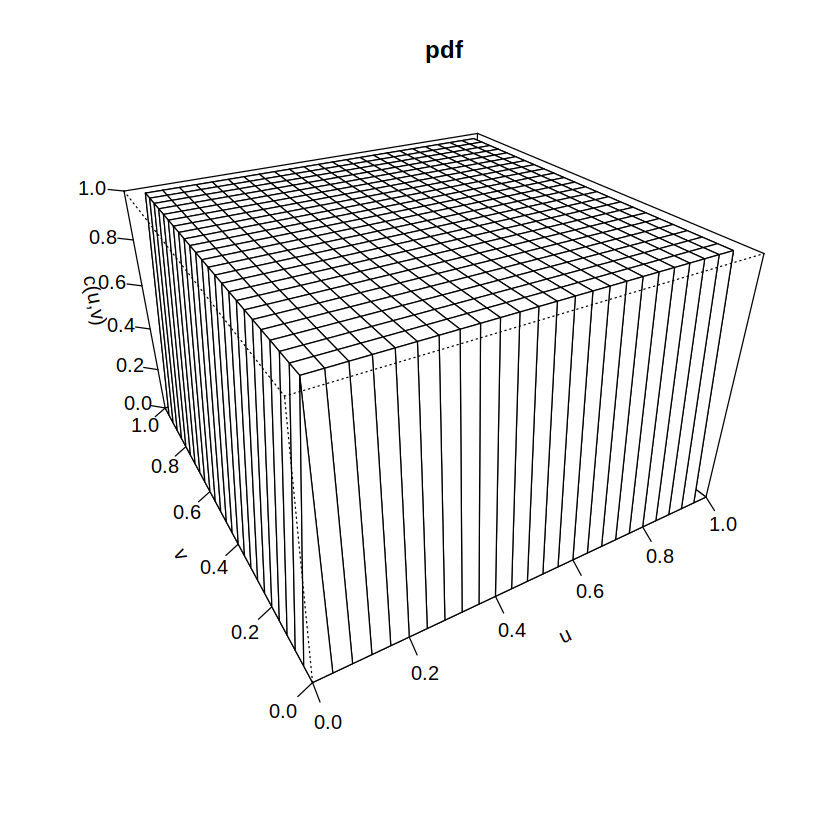

In [13]:
persp(normal_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

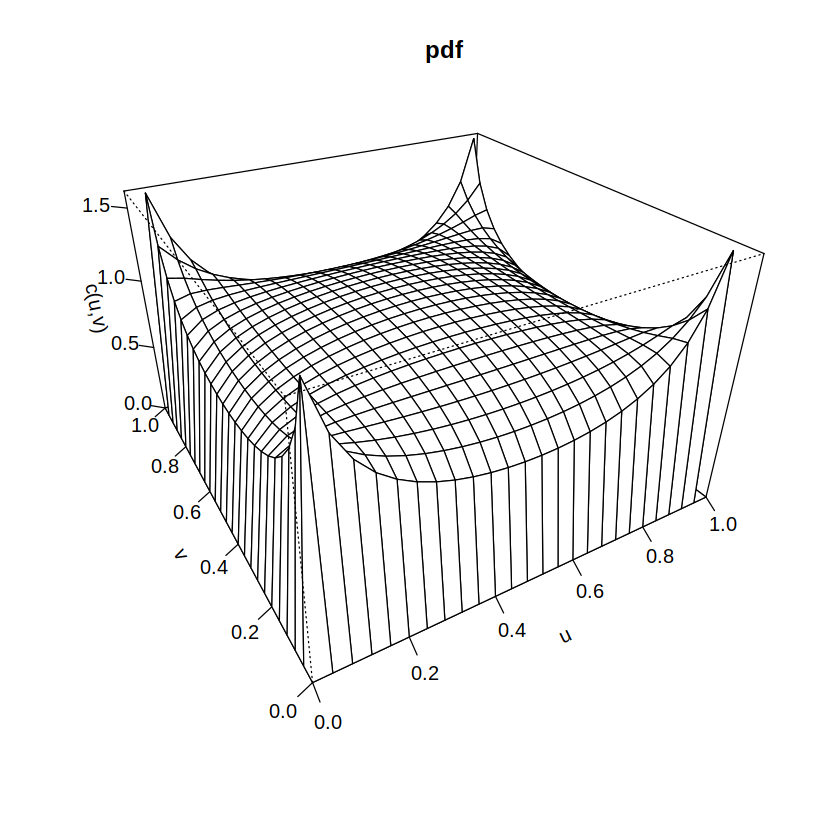

In [14]:
persp(t_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

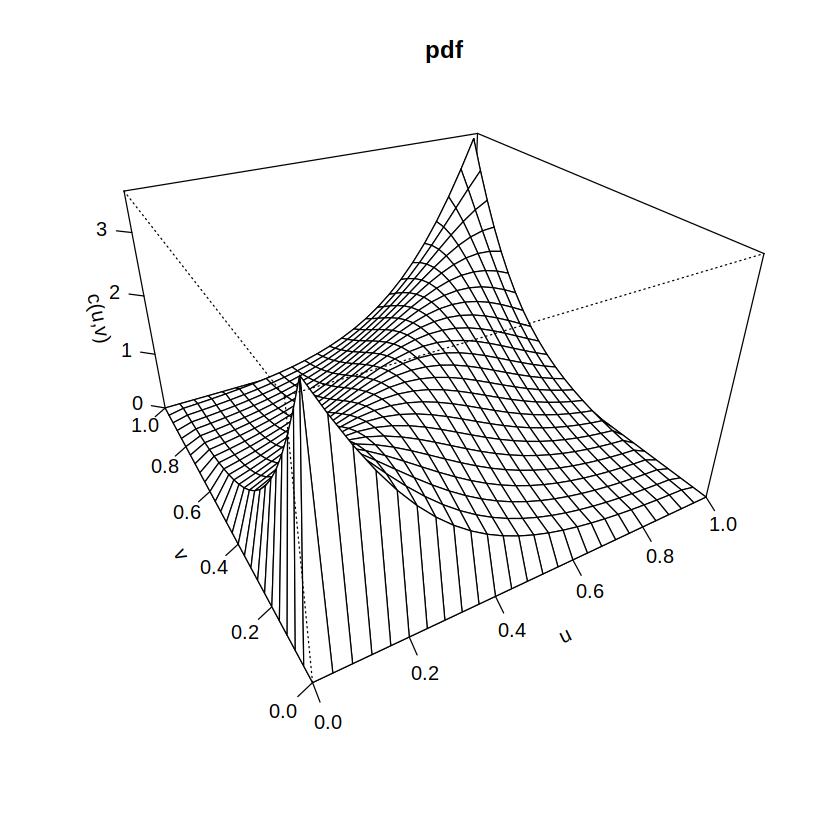

In [15]:
persp(Frank_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

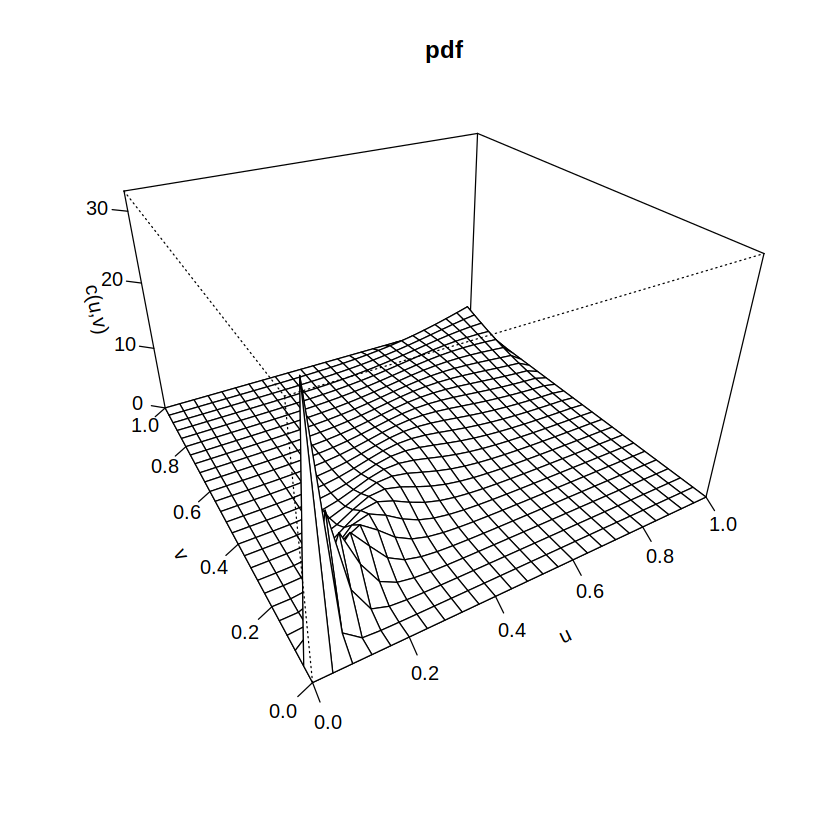

In [16]:
persp(Clayton_copula, dCopula, main="pdf",xlab="u", ylab="v", zlab="c(u,v)")

In [17]:
my.normal_copula.fit<-fitCopula(normal_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.normal_copula.fit@copula@parameters
parameters

[1] -0.909256

In [18]:
my.normal_copula.fit@loglik

[1] 433.4062

In [19]:
my.t_copula.fit<-fitCopula(t_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.t_copula.fit@copula@parameters
parameters

[1] -0.909059 79.544577
attr(,"fixed")
[1] FALSE FALSE

In [20]:
my.t_copula.fit@loglik

[1] 433.2482

In [21]:
my.Frank_copula.fit<-fitCopula(Frank_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.Frank_copula.fit@copula@parameters
parameters

[1] -12.23208

In [22]:
my.Frank_copula.fit@loglik

[1] 392.2803

In [26]:
my.Clayton_copula.fit<-fitCopula(Clayton_copula,
                               e_cop,
                               method = "ml",
                               optim.method = "BFGS",
                               optim.control = list(maxit=1000))

parameters <- my.Clayton_copula.fit@copula@parameters
parameters

ERROR: Error in optim(start, logL, lower = lower, upper = upper, method = optim.method, : non-finite finite-difference value [1]


In [24]:
my.Clayton_copula.fit@loglik

ERROR: Error in eval(expr, envir, enclos): object 'my.Clayton_copula.fit' not found


In [46]:
best_parameters <- my.normal_copula.fit@copula@parameters

In [ ]:
normal_copula

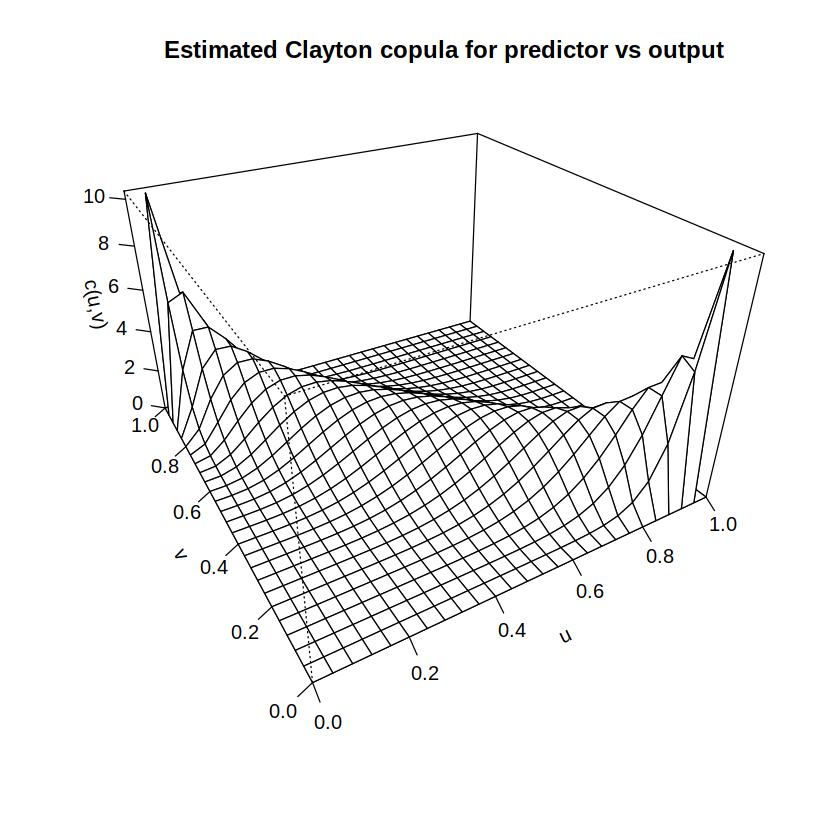

In [48]:
normal_copula@parameters<-best_parameters
persp(normal_copula, dCopula, main="Estimated Clayton copula for predictor vs output",xlab="u", ylab="v", zlab="c(u,v)")

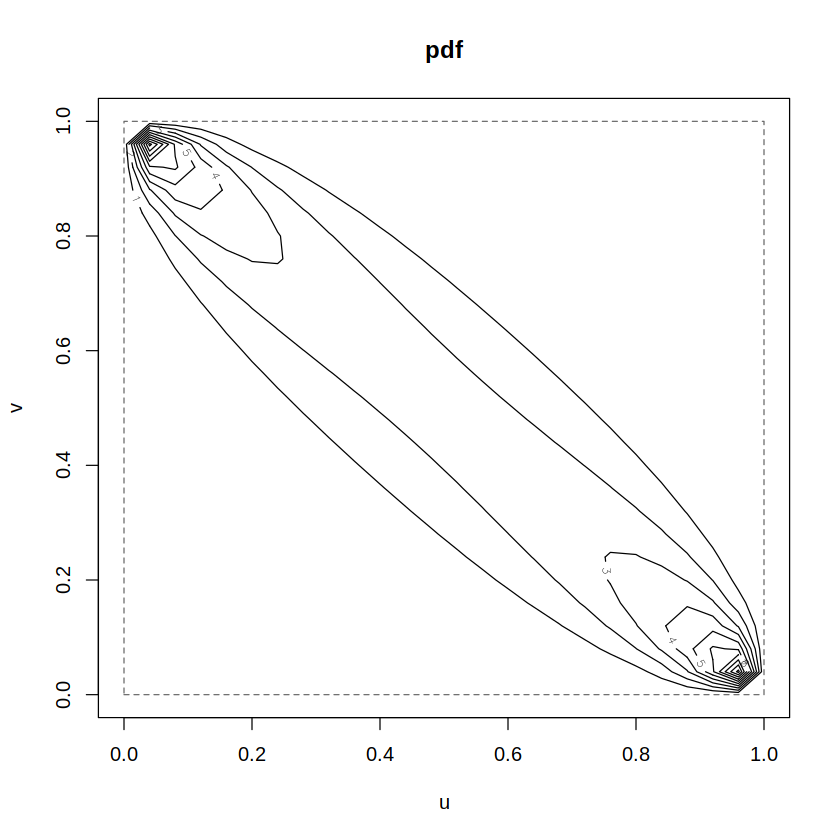

In [50]:
contour(normal_copula,dCopula, main="pdf",xlab="u", ylab="v")

In [51]:
data$predictor_DistrType

[1] "gamma"

In [52]:
data$predictor_DistrParameters


[1] 3 4

In [53]:
data$output_DistrType

[1] "logistic"

In [54]:
data$output_DistrParameters

[1] 1 1

In [55]:
predictor.copula <- pgamma(data$predictor, data$predictor_DistrParameters[1], data$predictor_DistrParameters[2])
output.copula <- pexp(data$output, rate = data$output_DistrParameters[2])

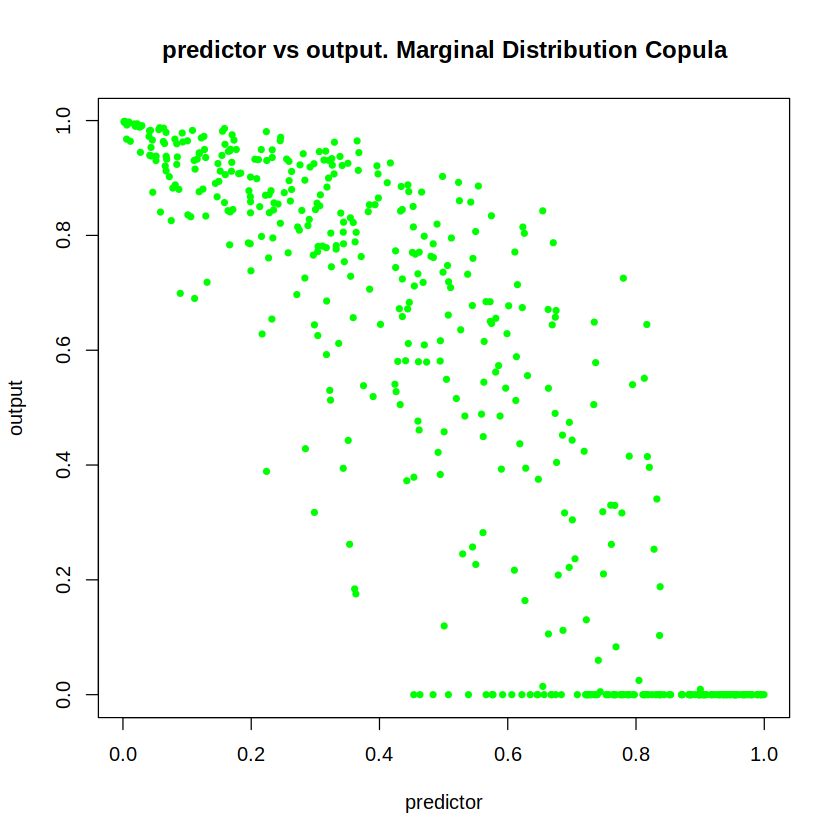

In [56]:
plot(predictor.copula,output.copula,main = 'predictor vs output. Marginal Distribution Copula', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')

In [58]:
quantileLevel <- function(numCopula,copula, theta,alpha)
{
  if (numCopula == 1)
  {
#Gaussian
    q <- pnorm(qnorm(alpha) *sqrt(1-theta*theta)  + theta* qnorm(copula[,1]))
  }
  if (numCopula == 2)
  {

      #Student
  }
  if (numCopula == 3)
  {
    #Frank
  }
  if (numCopula == 4)
  {
    #Clayton
    q <- ((alpha^(-theta/(1 + theta)) - 1) * (copula[,1]^(-theta)) + 1)^(-1/theta)
  }
  return(q)
}
copula <- cbind(predictor.copula,output.copula)
alpha <- 0.95
copulanum <- 4
parameters <- my.normal_copula.fit@copula@parameters
quantile <- quantileLevel(copulanum,copula, parameters,alpha)

In [59]:
(anomalindex <- which(copula[,2]>quantile))

[1]   1   2   3   4   5   6  23  27  28  29  32  40  55  65  70  74  75  76
 [19]  78  81  82  83  87  92  97 100 102 103 108 115 116 125 126 128 130 132
 [37] 142 146 152 160 161 162 166 174 178 179 180 182 186 188 195 199 212 223
 [55] 225 226 227 228 230 231 237 240 244 255 265 275 279 280 283 288 289 291
 [73] 317 322 324 325 330 333 344 347 351 355 356 357 358 359 360 361 369 373
 [91] 381 383 384 389 390 392 404 406 407 409 417 422 436 446 454 455 457 466
[109] 468 470 471 474 475 481 482 483 485 492 493 498

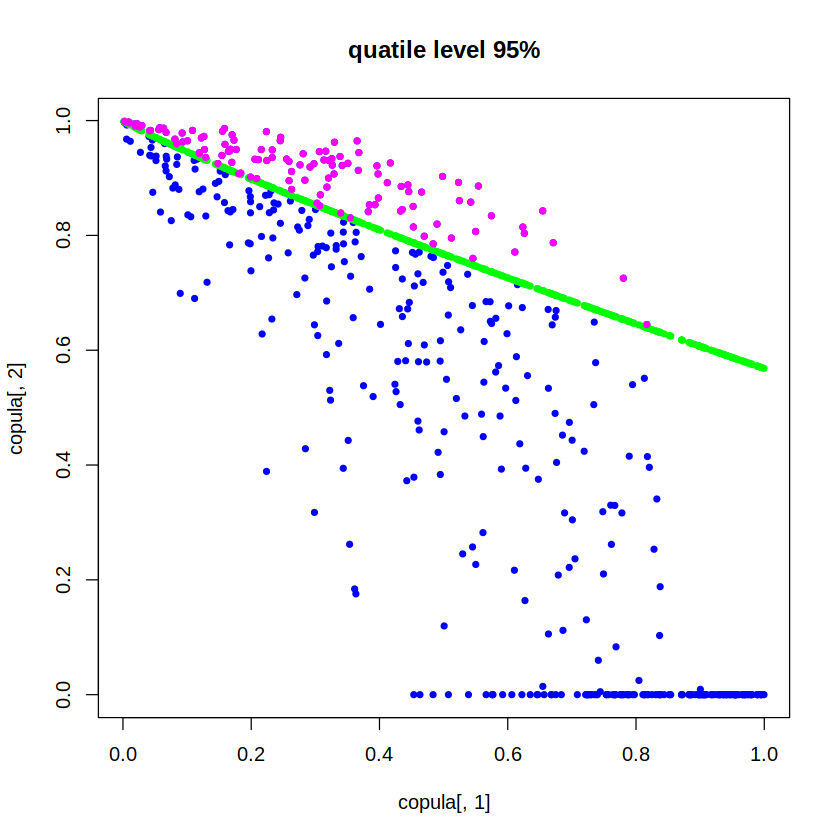

In [60]:
plot(copula[,1],copula[,2],pch =20,col = "blue",main = "quatile level 95%")
points(copula[,1],quantile,col = "green",pch = 20)
points(copula[anomalindex,1],copula[anomalindex,2],col = "magenta",pch = 20)

In [61]:
anomal_predictor <- data$predictor[anomalindex]
anomal_output    <- data$output[anomalindex]
head(anomal_predictor)

[1] 0.3827190 0.3478534 0.3065523 0.6342948 0.6938012 0.6217886

In [62]:
head(anomal_output)

[1] 2.318681 2.927825 3.591758 2.083287 1.969351 1.685889

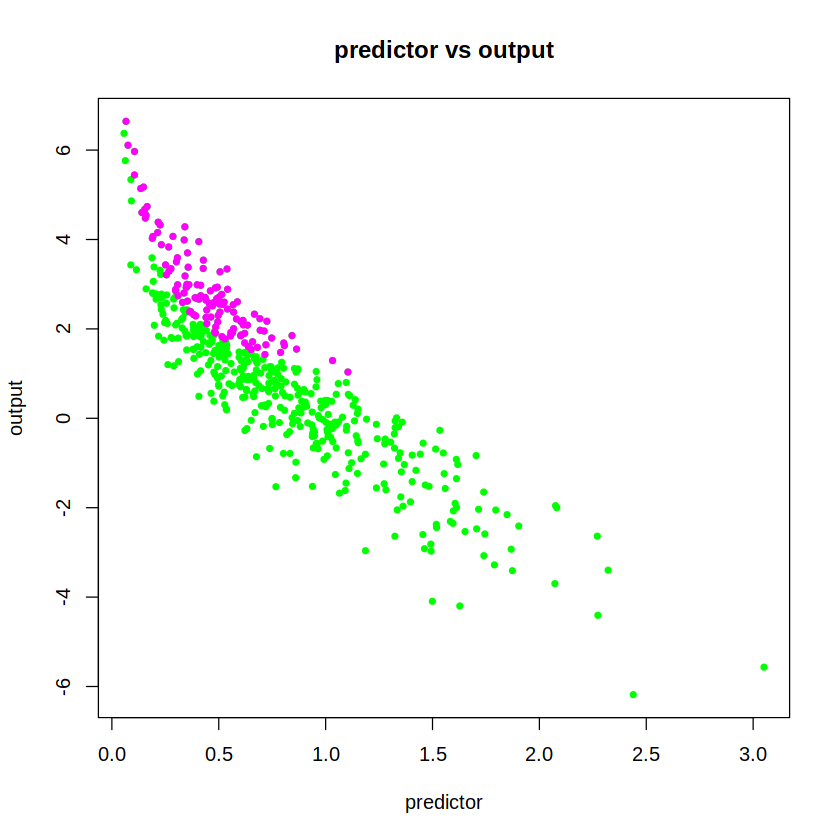

In [63]:
plot(data$predictor,data$output,main = 'predictor vs output', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')
points(data$predictor[anomalindex],data$output[anomalindex],col = "magenta",pch = 20)


In [64]:
variant <- 2

In [65]:
copulaNames <- c("normal", "student","frank","clayton")
copulaName <-copulaNames[copulanum]
copulaName

[1] "clayton"

In [66]:
myResult <- list(variant = variant,
                 copulaName = copulaName,
                 predictor.copula = predictor.copula,
                 output.copula = output.copula,
                 best_parameters = best_parameters,
                 anomal_predictor= anomal_predictor,
                 anomal_output= anomal_output)

saveRDS(myResult,"result.rds")